# 프로젝트 정리  

* 문제 정의
    - 노인빈곤율에 대한 사회적 문제
        - 노인빈곤율
        - OECD가 적용하고 있는 기준에 따라 전체인구 대상 가처분소득 중위 값의 절반에 미달하는 고령층이 전체 고령층에서 차지하는 비율
        - 우리나라 2인 가구 기준 중위소득이 2017년 280만원 내외 수준 임에 따라 월 140만원 소득에 미치지 못하는 가구가 상대적 빈곤층으로 분류된다. 

* 연구 목적
    -  은퇴 후 안정적인 자금 확보를 위한 투자 포트폴리오를 만듦으로써 노인빈곤율을 낮춘다.

In [1]:
# 한글 폰트 설정
import hangul_font

# 이미지 출력 모듈
from IPython.display import Image

# 데이터 전처리
import pandas as pd
import numpy as np

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Hangul font is set!


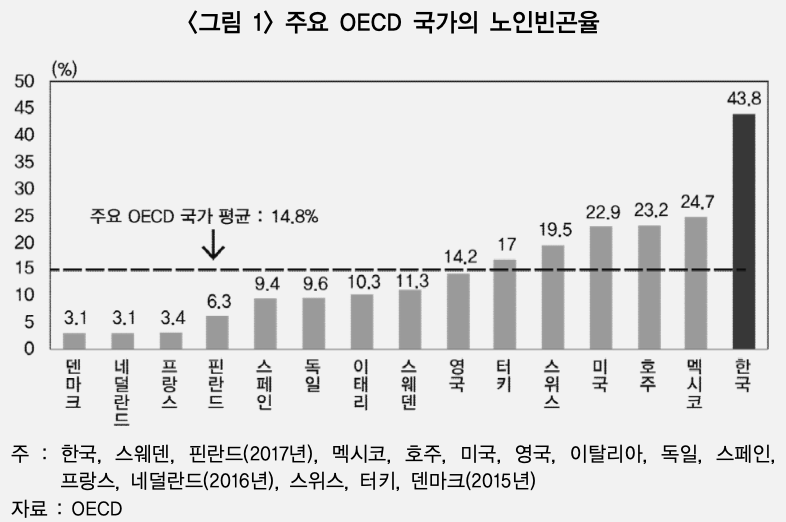

In [2]:
# 문제 정의

Image("data/1.png", width=600, height=70)

# 데이터 전처리

In [3]:
# Index(지수) Data 수집

sp_index = pd.read_csv("./data/S&P_Index.csv")
gold_index = pd.read_csv("./data/Gold_Index.csv")
commodity_index = pd.read_csv("./data/Commodity_Index.csv")
interm_index = pd.read_csv("./data/Intermediate_Term_Bond_Index.csv")
long_index = pd.read_csv("./data/Long_Term_Bond_Index.csv")

In [4]:
# 종가(close) 기준 weekly price

closes_df = pd.DataFrame({'Date': sp_index["Date"].copy(),
                          'SP_Close': sp_index["Close"].copy(),
                          'Long_Close': long_index["Close"].copy(),
                          'Interm_Close': interm_index["Close"].copy(),
                          'Commodity_Close': commodity_index["Close"].copy(),
                          'Gold_Close': gold_index["Close"].copy()}).round(2)

# Date 컬럼 날짜형식으로 변환 후 index 지정

closes_df['Date'] = pd.to_datetime(closes_df['Date'])
closes_df = closes_df.set_index('Date', drop=True)

closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996-07-01,657.44,9.41,10.07,207.88,382
1996-07-08,646.19,9.58,10.18,210.44,384
1996-07-15,638.73,9.64,10.22,198.54,385
1996-07-22,635.90,9.60,10.19,193.01,386
1996-07-29,662.49,9.87,10.38,200.48,388
...,...,...,...,...,...
2020-06-01,3193.93,14.93,12.03,325.54,1683
2020-06-08,3041.31,15.51,12.12,314.28,1737
2020-06-15,3097.74,15.51,12.13,327.64,1753


In [5]:
# 주간수익률 : 전주 대비 현재 주 수익 변화

index_df = (closes_df - closes_df.shift(1)) / closes_df.shift(1)
index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996-07-01,NaN,NaN,NaN,NaN,NaN
1996-07-08,-0.017112,0.018066,0.010924,0.012315,0.005236
1996-07-15,-0.011545,0.006263,0.003929,-0.056548,0.002604
1996-07-22,-0.004431,-0.004149,-0.002935,-0.027853,0.002597
1996-07-29,0.041815,0.028125,0.018646,0.038703,0.005181
...,...,...,...,...,...
2020-06-01,0.049147,-0.043562,-0.008244,0.060115,-0.031088
2020-06-08,-0.047784,0.038848,0.007481,-0.034589,0.032086
2020-06-15,0.018555,0.000000,0.000825,0.042510,0.009211


In [6]:
# 누적수익률 계산 : 첫 주(1996-07-01) 대비 현재 주 수익 변화

cumul_index_df = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0]
cumul_index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996-07-01,0.000000,0.000000,0.000000,0.000000,0.000000
1996-07-08,-0.017112,0.018066,0.010924,0.012315,0.005236
1996-07-15,-0.028459,0.024442,0.014896,-0.044930,0.007853
1996-07-22,-0.032763,0.020191,0.011917,-0.071532,0.010471
1996-07-29,0.007681,0.048884,0.030785,-0.035597,0.015707
...,...,...,...,...,...
2020-06-01,3.858132,0.586610,0.194638,0.566000,3.405759
2020-06-08,3.625989,0.648247,0.203575,0.511834,3.547120
2020-06-15,3.711822,0.648247,0.204568,0.576102,3.589005


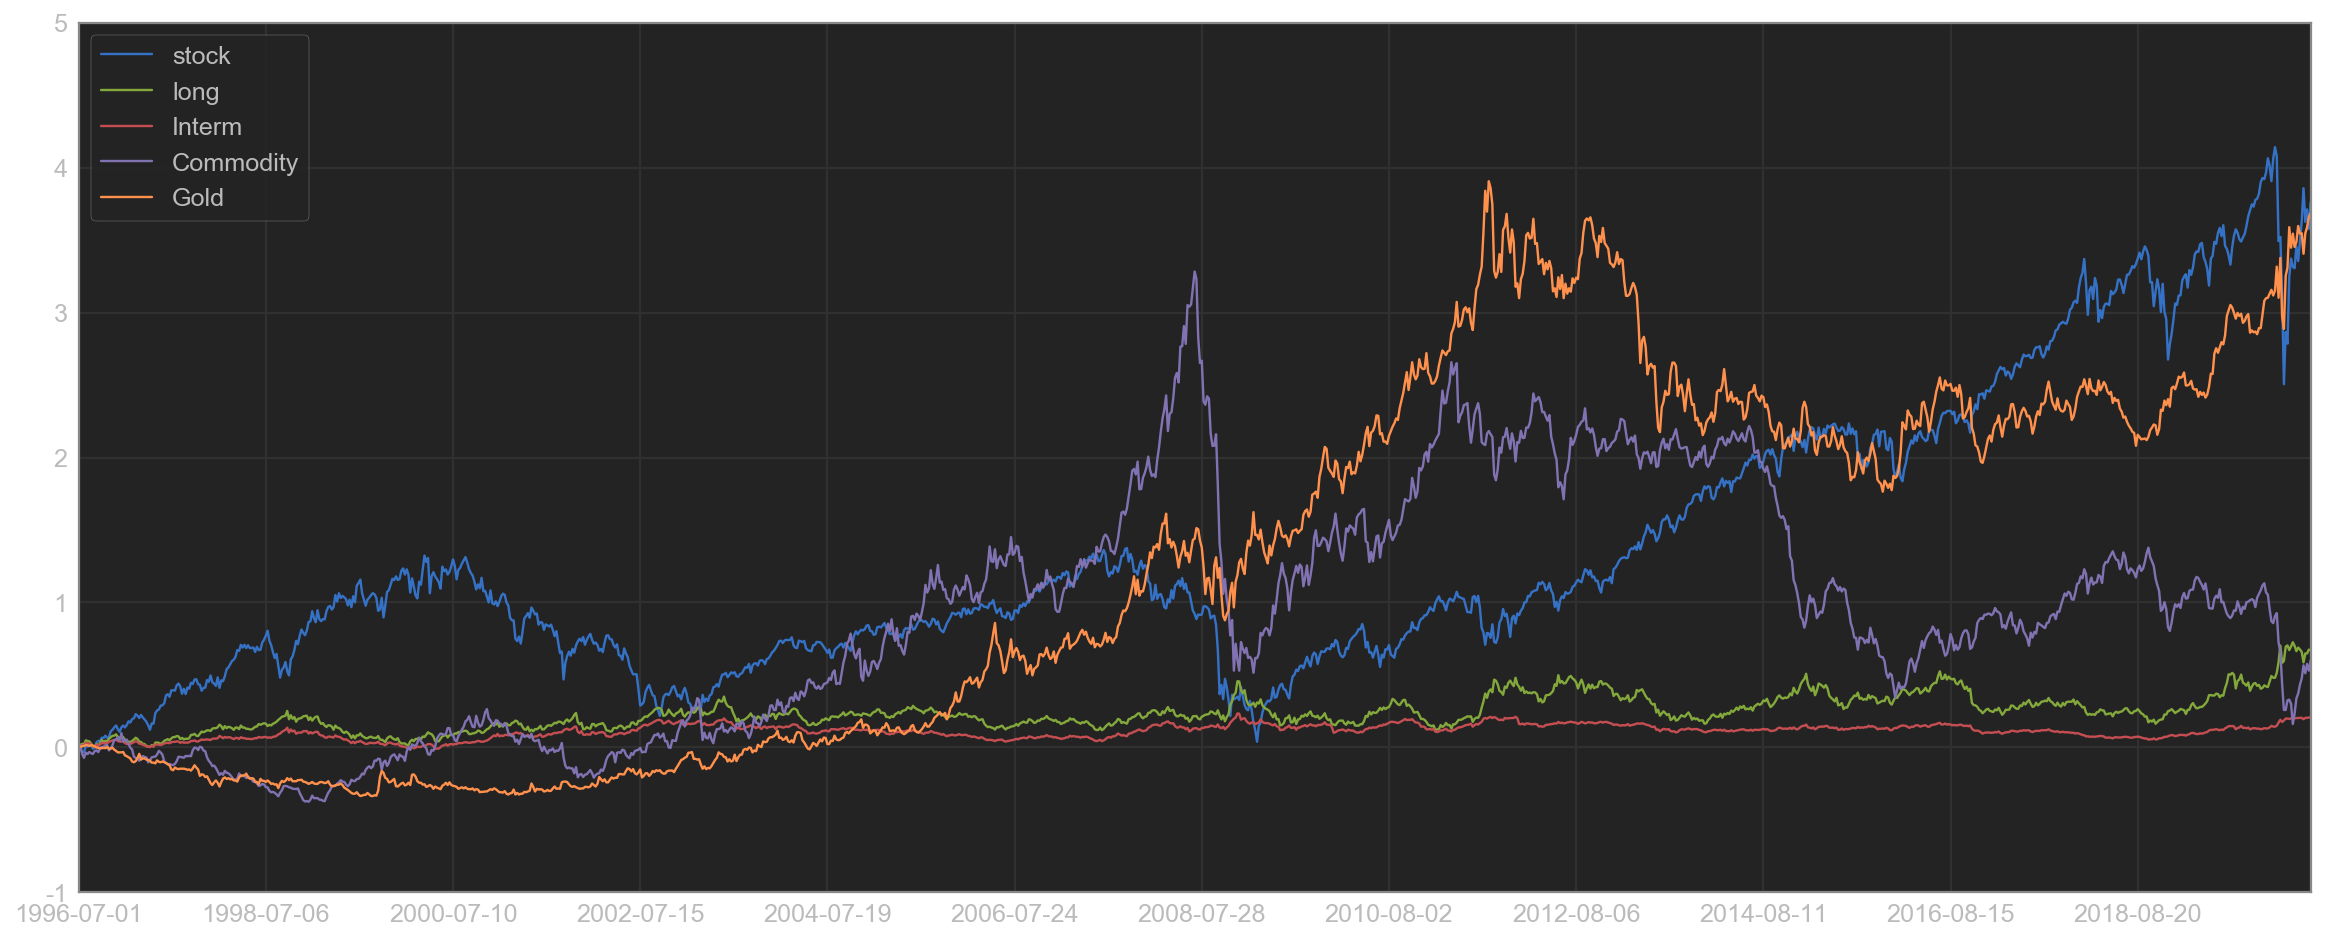

In [7]:
# 자산별 누적수익률 추이 비교

plt.figure(figsize=(20, 8))

plt.plot(cumul_index_df.index, cumul_index_df.SP_Close, label="stock")
plt.plot(cumul_index_df.index, cumul_index_df.Long_Close, label="long")
plt.plot(cumul_index_df.index, cumul_index_df.Interm_Close, label="Interm")
plt.plot(cumul_index_df.index, cumul_index_df.Commodity_Close, label="Commodity")
plt.plot(cumul_index_df.index, cumul_index_df.Gold_Close, label="Gold")

plt.xticks(cumul_index_df.index[::105])
plt.axis(["1996-07-01", "2020-06-29", -1, 5])

plt.grid(True)
plt.legend()
plt.show()

## 포트폴리오 구성
- portfolio_1 : 주식 100%
- portfolio_2 : 주식 60% + 장기채 40%
- portfolio_3 : All_Weather : 주식 30% + 장기채 40% + 중기채 15% + 원자재 7.5% + 금 7.5%

In [9]:
# 포트폴리오 자산 배분

equity_names = ["Stock", "Long_bond", "Interm_bond", "Commodity", "Gold"]

# 주식 100%
stock100 = [1, 0, 0, 0, 0]
# 주식 60%, 채권 40%
s6_b4 = [0.6, 0.4, 0, 0, 0]
# 주식 30%, 장기채 40%, 중기채 15%, 원자재 7.5%, 금 7.5%
all_weather = [0.3, 0.4, 0.15, 0.075, 0.075]

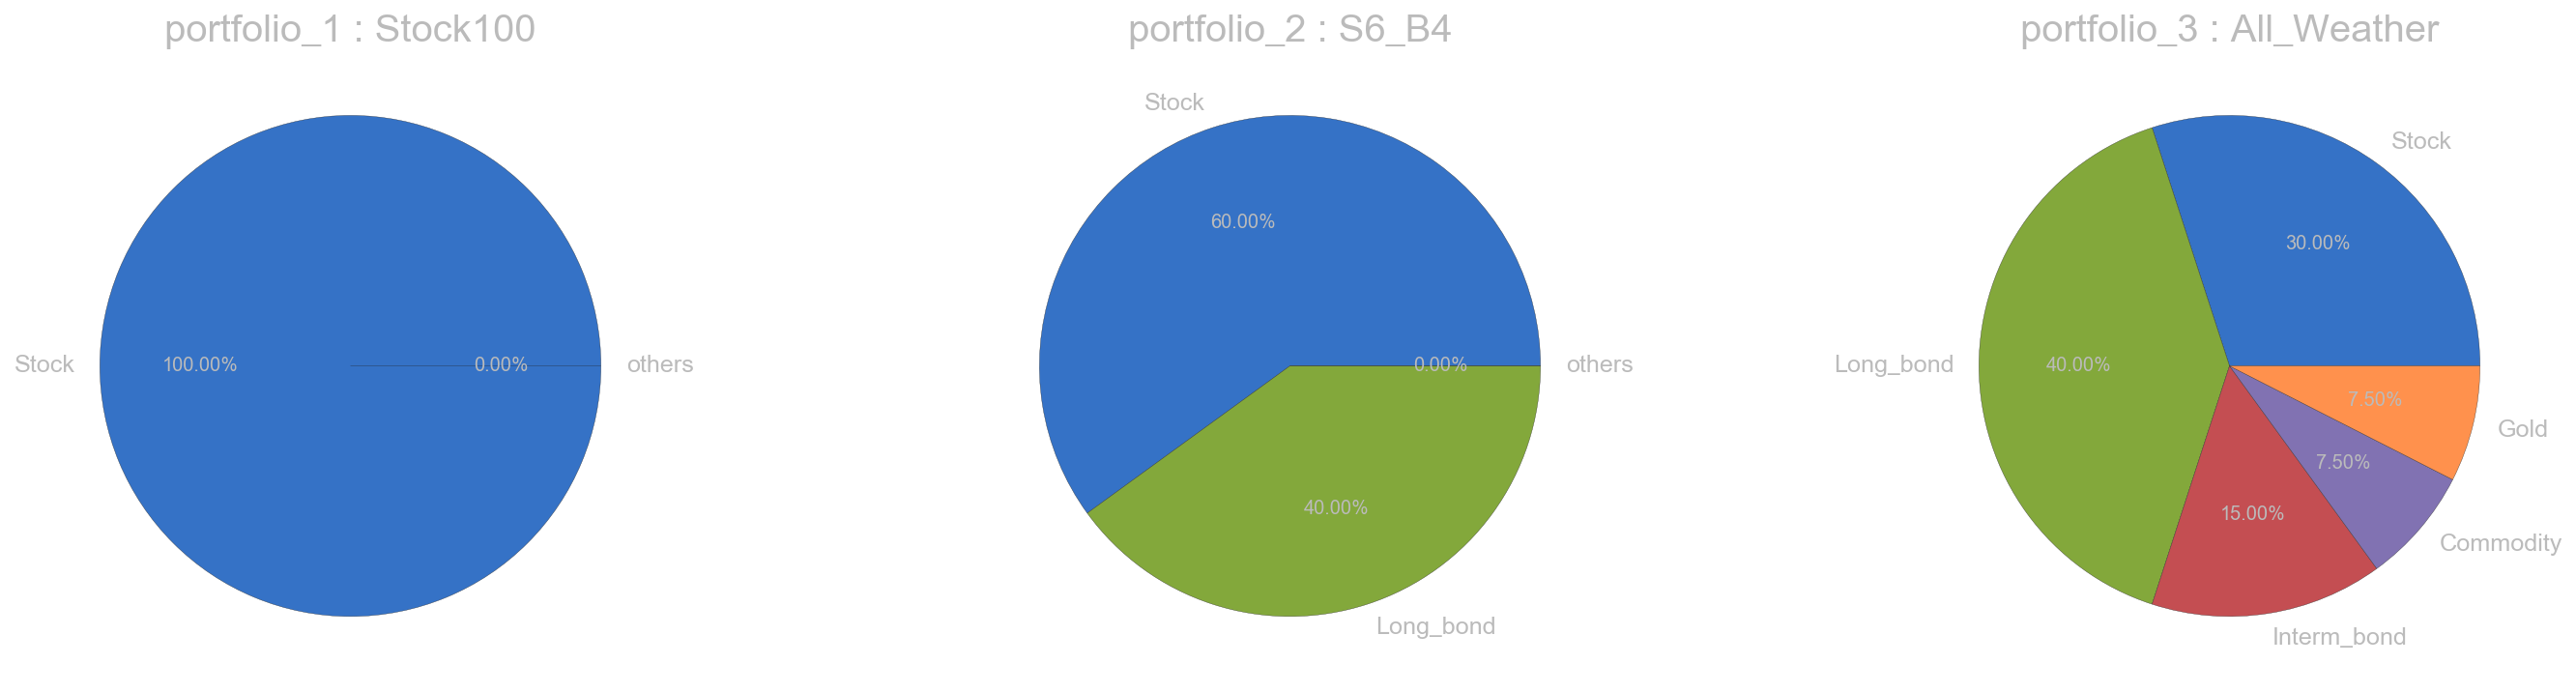

In [10]:
# 자산배분 비율 원그래프

plt.figure(figsize=(20, 8))

# 1. 주식 100%
data1 = stock100[:1] + [0]
data2 = equity_names[:1] + ["others"]

plt.subplot(131)
plt.pie(data1, labels=data2, autopct='%0.2f%%')
plt.title('portfolio_1 : Stock100', fontsize=20)

# 2. 주식 60% : 채권 40%
data3 = s6_b4[:2] + [0]
data4 = equity_names[:2] + ["others"]

plt.subplot(132)
plt.pie(data3, labels=data4, autopct='%0.2f%%')
plt.title('portfolio_2 : S6_B4', fontsize=20)

# 3. 올웨더 포트폴리오
plt.subplot(133)
plt.pie(all_weather, labels=equity_names, autopct='%0.2f%%')
plt.title('portfolio_3 : All_Weather', fontsize=20)

plt.subplots_adjust(top=1, bottom=0.1, left=0.1,
                    right=1, hspace=0.5, wspace=0.5)

In [11]:
# 포트폴리오에 따른 주간 수익률 분석
# index_df에 각 자산의 비중을 곱하여 전체 주간 수익률을 분석할 수 있다.

def get_port_return(w1, w2, w3, w4, w5):

    return (index_df * [w1, w2, w3, w4, w5]).sum(axis=1)


# portfolio_1 : Stock100
df_stock100 = pd.DataFrame({"Stock100": get_port_return(*stock100)})

# portfolio_2 : S6_B4
df_s6_b4 = pd.DataFrame({"S6_B4": get_port_return(*s6_b4)})

# portfolio_3 : All_Weather
df_all_weather = pd.DataFrame({"All_Weather": get_port_return(*all_weather)})

port_df = pd.DataFrame({"Stock100": df_stock100["Stock100"],
                        "S6_B4": df_s6_b4["S6_B4"],
                        "All_Weather": df_all_weather["All_Weather"]
                        })
port_df

,Stock100,S6_B4,All_Weather
Date,,,
1996-07-01,0.000000,0.000000,0.000000
1996-07-08,-0.017112,-0.003041,0.005048
1996-07-15,-0.011545,-0.004422,-0.004415
1996-07-22,-0.004431,-0.004318,-0.005323
1996-07-29,0.041815,0.036339,0.029883
...,...,...,...
2020-06-01,0.049147,0.012064,-0.001740
2020-06-08,-0.047784,-0.013131,0.002138
2020-06-15,0.018555,0.011133,0.009569


In [12]:
# 포트폴리오에 따른 누적수익률 분석
# cumul_index_df에 각 자산의 비중을 곱하여 전체 누적 수익률을 분석할 수 있다.

def get_port_cumul_return(w1, w2, w3, w4, w5):

    return (cumul_index_df * [w1, w2, w3, w4, w5]).sum(axis=1)


df_cul_stock100 = pd.DataFrame({"Stock100": get_port_cumul_return(*stock100)})
df_cul_s6_b4 = pd.DataFrame({"S6_B4": get_port_cumul_return(*s6_b4)})
df_cul_all_weather = pd.DataFrame(
    {"All_Weather": get_port_cumul_return(*all_weather)})

port_cul_df = pd.DataFrame({"Stock100": df_cul_stock100["Stock100"],
                            "S6_B4": df_cul_s6_b4["S6_B4"],
                            "All_Weather": df_cul_all_weather["All_Weather"]
                            })

port_cul_df

,Stock100,S6_B4,All_Weather
Date,,,
1996-07-01,0.000000,0.000000,0.000000
1996-07-08,-0.017112,-0.003041,0.005048
1996-07-15,-0.028459,-0.007298,0.000693
1996-07-22,-0.032763,-0.011582,-0.004545
1996-07-29,0.007681,0.024162,0.024984
...,...,...,...
2020-06-01,3.858132,2.549523,1.719161
2020-06-08,3.625989,2.434892,1.682053
2020-06-15,3.711822,2.486392,1.715913


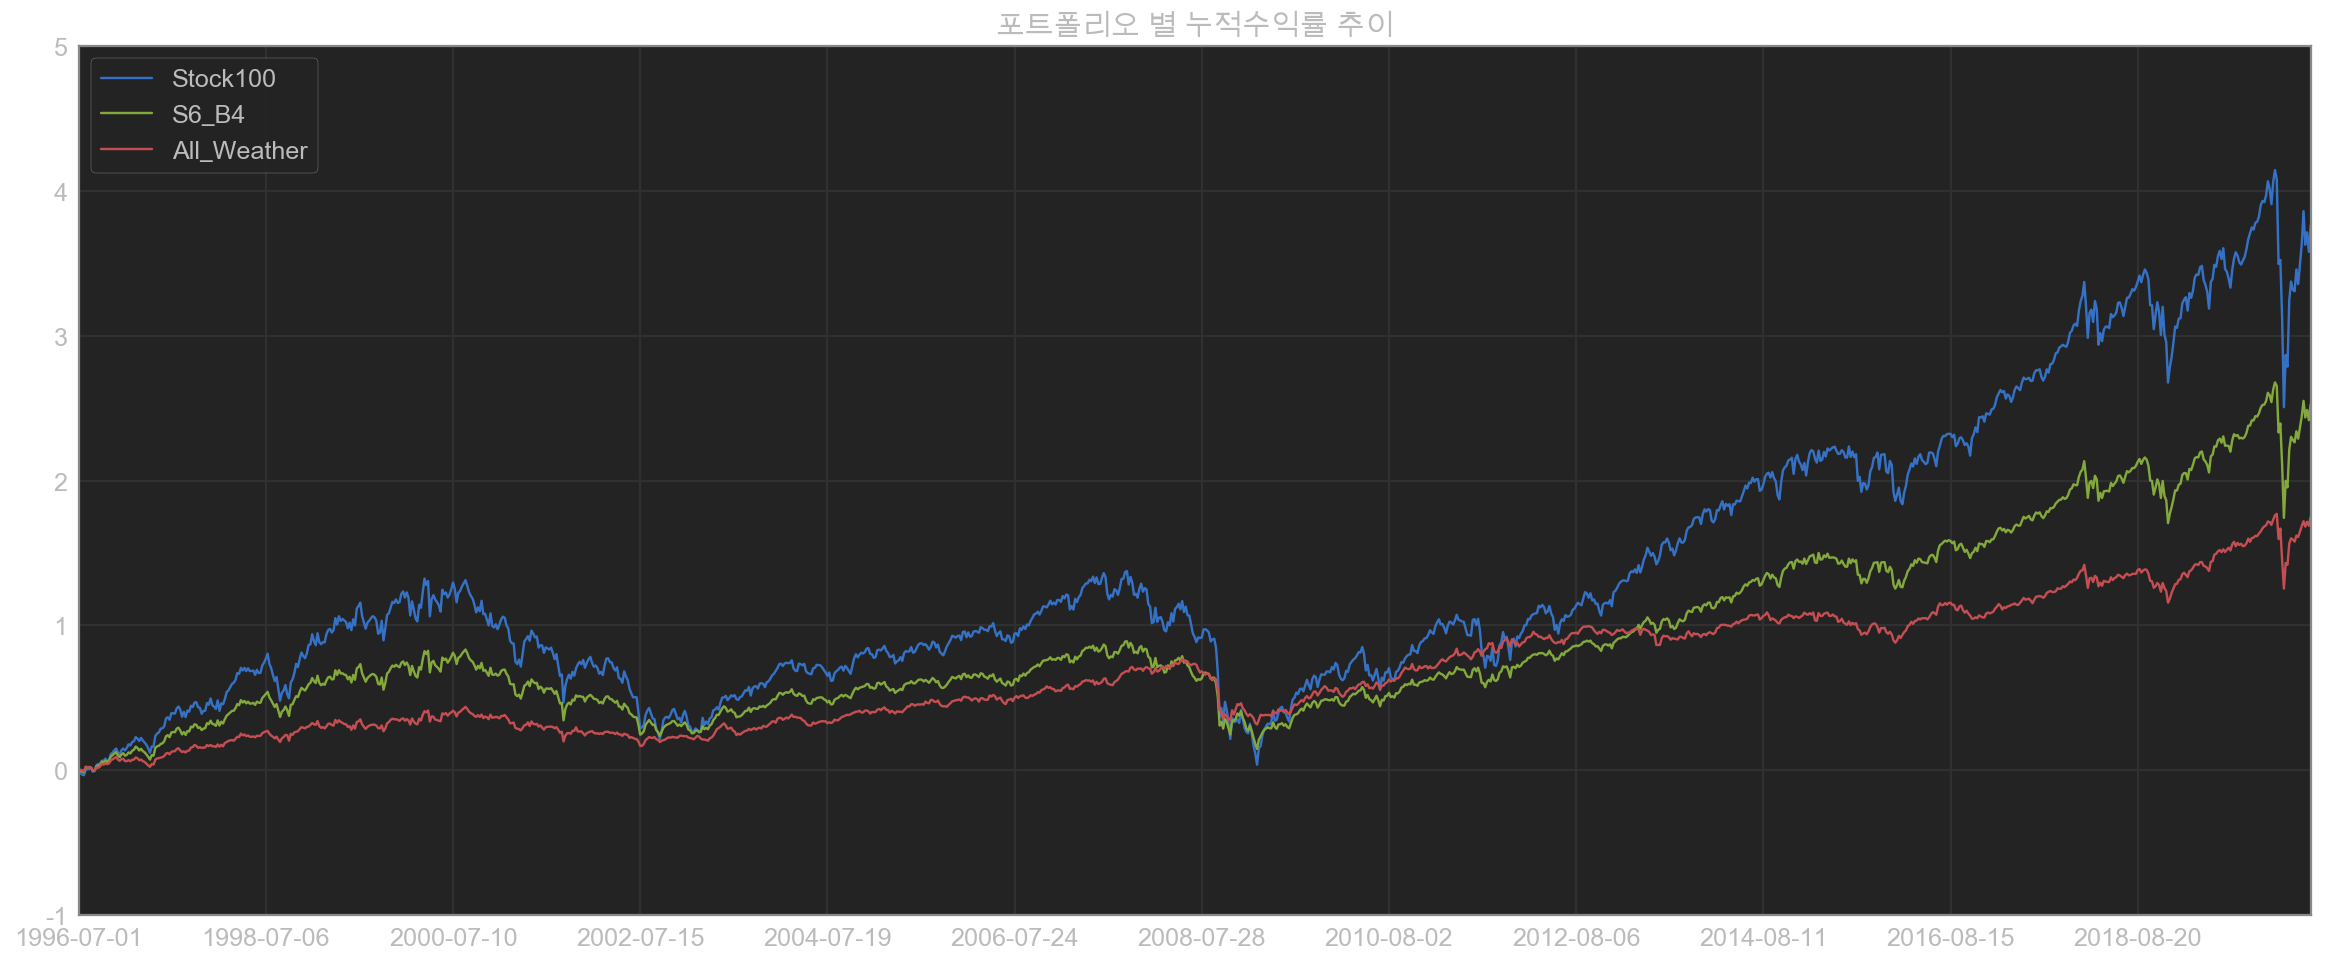

In [13]:
# 포트폴리오에 따른 누적수익률 추이 분석

plt.figure(figsize=(20, 8))

plt.plot(port_cul_df.index, port_cul_df.Stock100, label="Stock100")
plt.plot(port_cul_df.index, port_cul_df.S6_B4, label="S6_B4")
plt.plot(port_cul_df.index, port_cul_df.All_Weather, label="All_Weather")

plt.xticks(cumul_index_df.index[::105])
plt.axis(["1996-07-01", "2020-06-29", -1, 5])

plt.title('포트폴리오 별 누적수익률 추이')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# 25년간 누적 수익률
data_cumul_rate = pd.Series({"Stock100": port_cul_df["Stock100"].loc["2020.6.29"],
                             "S6_B4": port_cul_df["S6_B4"].loc["2020.6.29"],
                             "All_Weather": port_cul_df["All_Weather"].loc["2020.6.29"]})
# 최고 주간 상승 폭
data_max = pd.Series({"Stock100": port_df["Stock100"].max(),
                      "S6_B4": port_df["S6_B4"].max(),
                      "All_Weather": port_df["All_Weather"].max()})
# 최고 주간 하락 폭
data_min = pd.Series({"Stock100": port_df["Stock100"].min(),
                      "S6_B4": port_df["S6_B4"].min(),
                      "All_Weather": port_df["All_Weather"].min()})
# 마이너스 수익률 주간의 개수
data_minus_count = pd.Series({"Stock100": (port_df["Stock100"] < 0).sum(),
                              "S6_B4": (port_df["S6_B4"] < 0).sum(),
                              "All_Weather": (port_df["All_Weather"] < 0).sum()})

summary_port_df = pd.DataFrame({"누적 수익률": data_cumul_rate,
                                "최고 주간 상승 폭": data_max,
                                "최고 주간 하락 폭": data_min,
                                "마이너스 수익률 주간의 개수": data_minus_count
                                })
summary_port_df

,누적 수익률,최고 주간 상승 폭,최고 주간 하락 폭,마이너스 수익률 주간의 개수
Stock100,3.760906,0.121017,-0.181955,548
S6_B4,2.524769,0.086061,-0.120002,561
All_Weather,1.749160,0.064088,-0.076482,550


**백테스트 결과**

> - **All_Weather portfolio가 아무리 안전해도 수익이 25년간 170%인 점을 감안하면 투자할만한 가치가 있다고 판단되지 않음** 
> - **All_Weather portfolio처럼 안정적이면서도 더 수익률이 좋은 포트폴리오가 필요하다고 판단하여 자산을 새롭게 배분한 New All Weather 포트폴리오를 구성할 필요성을 느낌** 

##  New All Weather porfolio 만들기
    - 더 높은 수익률을 위하여 시장지표인 SP_500와 상관관계가 낮은 자산 비중을 줄이고 상관관계가 높은 자산의 비중을 높인다.

<AxesSubplot:>

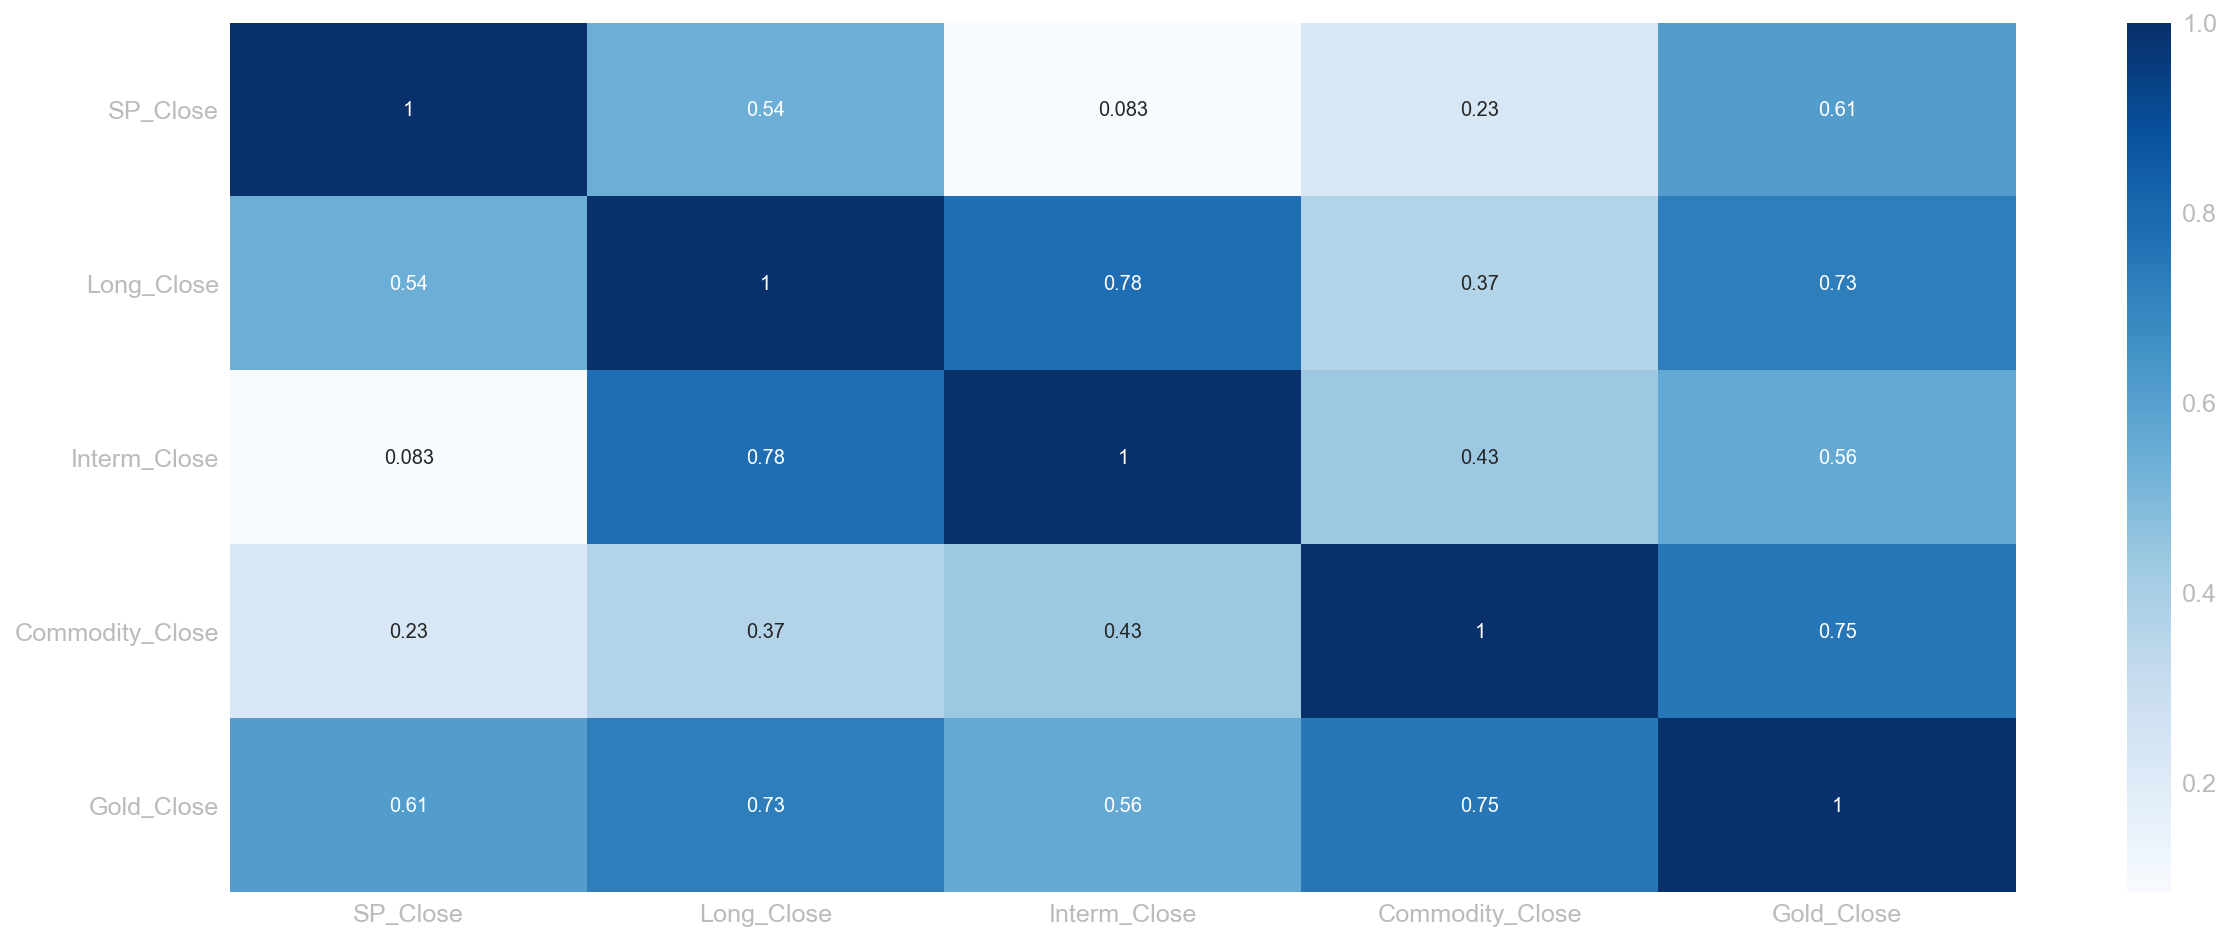

In [15]:
# 누적 수익률이 가장 높은 S&P500 자산과 상관관계가 높은 자산 분석

plt.figure(figsize=(20, 8))
sns.heatmap(data=cumul_index_df.corr(), annot=True, cmap="Blues")

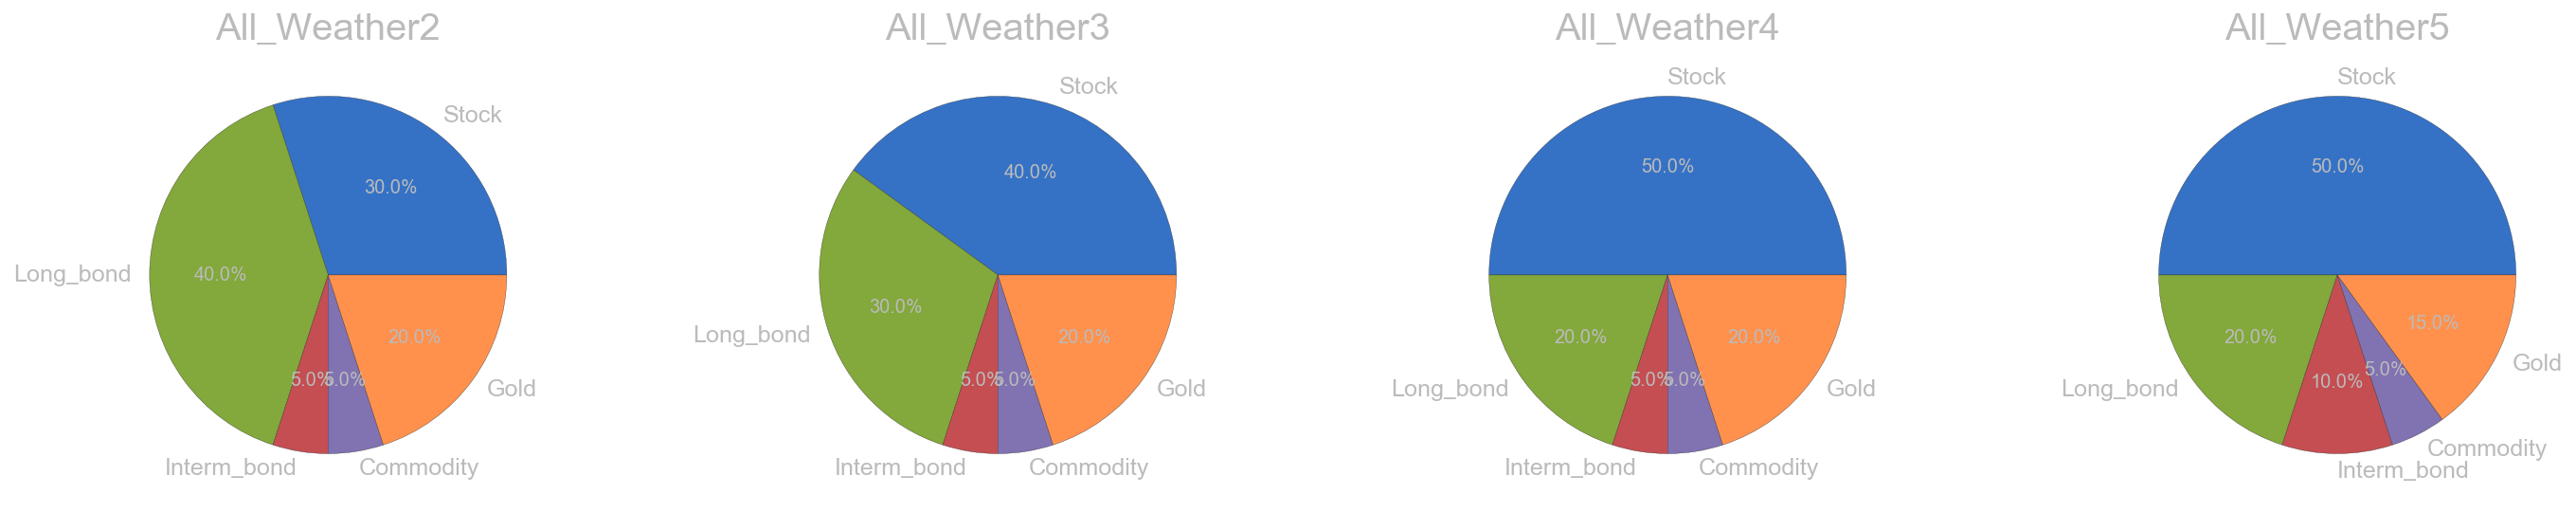

In [16]:
# 상관관계가 높은 자산의 비중을 높인다.

# all_weather2 Interm, Commodity를 각각 0.1, 0.025 줄이고 Gold를 0.125 증가
all_weather2 = [0.3, 0.4, 0.05, 0.05, 0.2]
# all_weather3 Long, Interm, Commodity를 각각 0.1, 0.1, 0.025 줄이고 SP와 GOld를 각각 0.1, 0.125 증가
all_weather3 = [0.4, 0.3, 0.05, 0.05, 0.2]
# all_weather4 Long, Interm, Commodity를 각각 0.2, 0.1, 0.025 줄이고 SP와 GOld를 각각 0.2, 0.125 증가
all_weather4 = [0.5, 0.2, 0.05, 0.05, 0.2]
# all_weather5 Long, Interm, Commodity를 각각 0.2, 0.05, 0.025 줄이고 SP와 GOld를 각각 0.2, 0.075 증가
all_weather5 = [0.5, 0.2, 0.1, 0.05, 0.15]

# New all_weather portfolio 자산배분 비중 원그래프

plt.figure(figsize=(20, 8))

plt.subplot(141)
plt.pie(all_weather2, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather2', fontsize=20)

plt.subplot(142)
plt.pie(all_weather3, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather3', fontsize=20)

plt.subplot(143)
plt.pie(all_weather4, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather4', fontsize=20)

plt.subplot(144)
plt.pie(all_weather5, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather5', fontsize=20)


plt.subplots_adjust(top=1, bottom=0.1, left=0.1,
                    right=1, hspace=0.5, wspace=0.5)

In [17]:
# 전체 자산배분 포트폴리오의 주간수익률 데이터프레임 만들기

df_all_weather2 = pd.DataFrame(
    {"All_Weather2": get_port_return(*all_weather2)})
df_all_weather3 = pd.DataFrame(
    {"All_Weather3": get_port_return(*all_weather3)})
df_all_weather4 = pd.DataFrame(
    {"All_Weather4": get_port_return(*all_weather4)})
df_all_weather5 = pd.DataFrame(
    {"All_Weather5": get_port_return(*all_weather5)})

port_df = pd.DataFrame({"Stock100": df_stock100["Stock100"],
                        "S6_B4": df_s6_b4["S6_B4"],
                        "All_Weather": df_all_weather["All_Weather"],
                        "All_Weather2": df_all_weather2["All_Weather2"],
                        "All_Weather3": df_all_weather3["All_Weather3"],
                        "All_Weather4": df_all_weather4["All_Weather4"],
                        "All_Weather5": df_all_weather5["All_Weather5"]
                        })
port_df.tail(2)

,Stock100,S6_B4,All_Weather,All_Weather2,All_Weather3,All_Weather4,All_Weather5
Date,,,,,,,
2020-06-22,-0.028631,-0.010731,-0.002925,-0.000436,-0.004911,-0.009386,-0.010074
2020-06-29,0.040199,0.023104,0.015072,0.014531,0.018804,0.023078,0.022838


In [18]:
# 전체 자산배분 포트폴리오의 누적수익률 데이터프레임 만들기

df_cul_all_weather2 = pd.DataFrame(
    {"All_Weather2": get_port_cumul_return(*all_weather2)})
df_cul_all_weather3 = pd.DataFrame(
    {"All_Weather3": get_port_cumul_return(*all_weather3)})
df_cul_all_weather4 = pd.DataFrame(
    {"All_Weather4": get_port_cumul_return(*all_weather4)})
df_cul_all_weather5 = pd.DataFrame(
    {"All_Weather5": get_port_cumul_return(*all_weather5)})

port_cul_df = pd.DataFrame({"Stock100": df_cul_stock100["Stock100"],
                            "S6_B4": df_cul_s6_b4["S6_B4"],
                            "All_Weather": df_cul_all_weather["All_Weather"],
                            "All_Weather2": df_cul_all_weather2["All_Weather2"],
                            "All_Weather3": df_cul_all_weather3["All_Weather3"],
                            "All_Weather4": df_cul_all_weather4["All_Weather4"],
                            "All_Weather5": df_cul_all_weather5["All_Weather5"]
                            })
port_cul_df.tail(2)

,Stock100,S6_B4,All_Weather,All_Weather2,All_Weather3,All_Weather4,All_Weather5
Date,,,,,,,
2020-06-22,3.576920,2.416077,1.688223,2.111774,2.401985,2.692196,2.519539
2020-06-29,3.760906,2.524769,1.749160,2.174108,2.483142,2.792176,2.618261


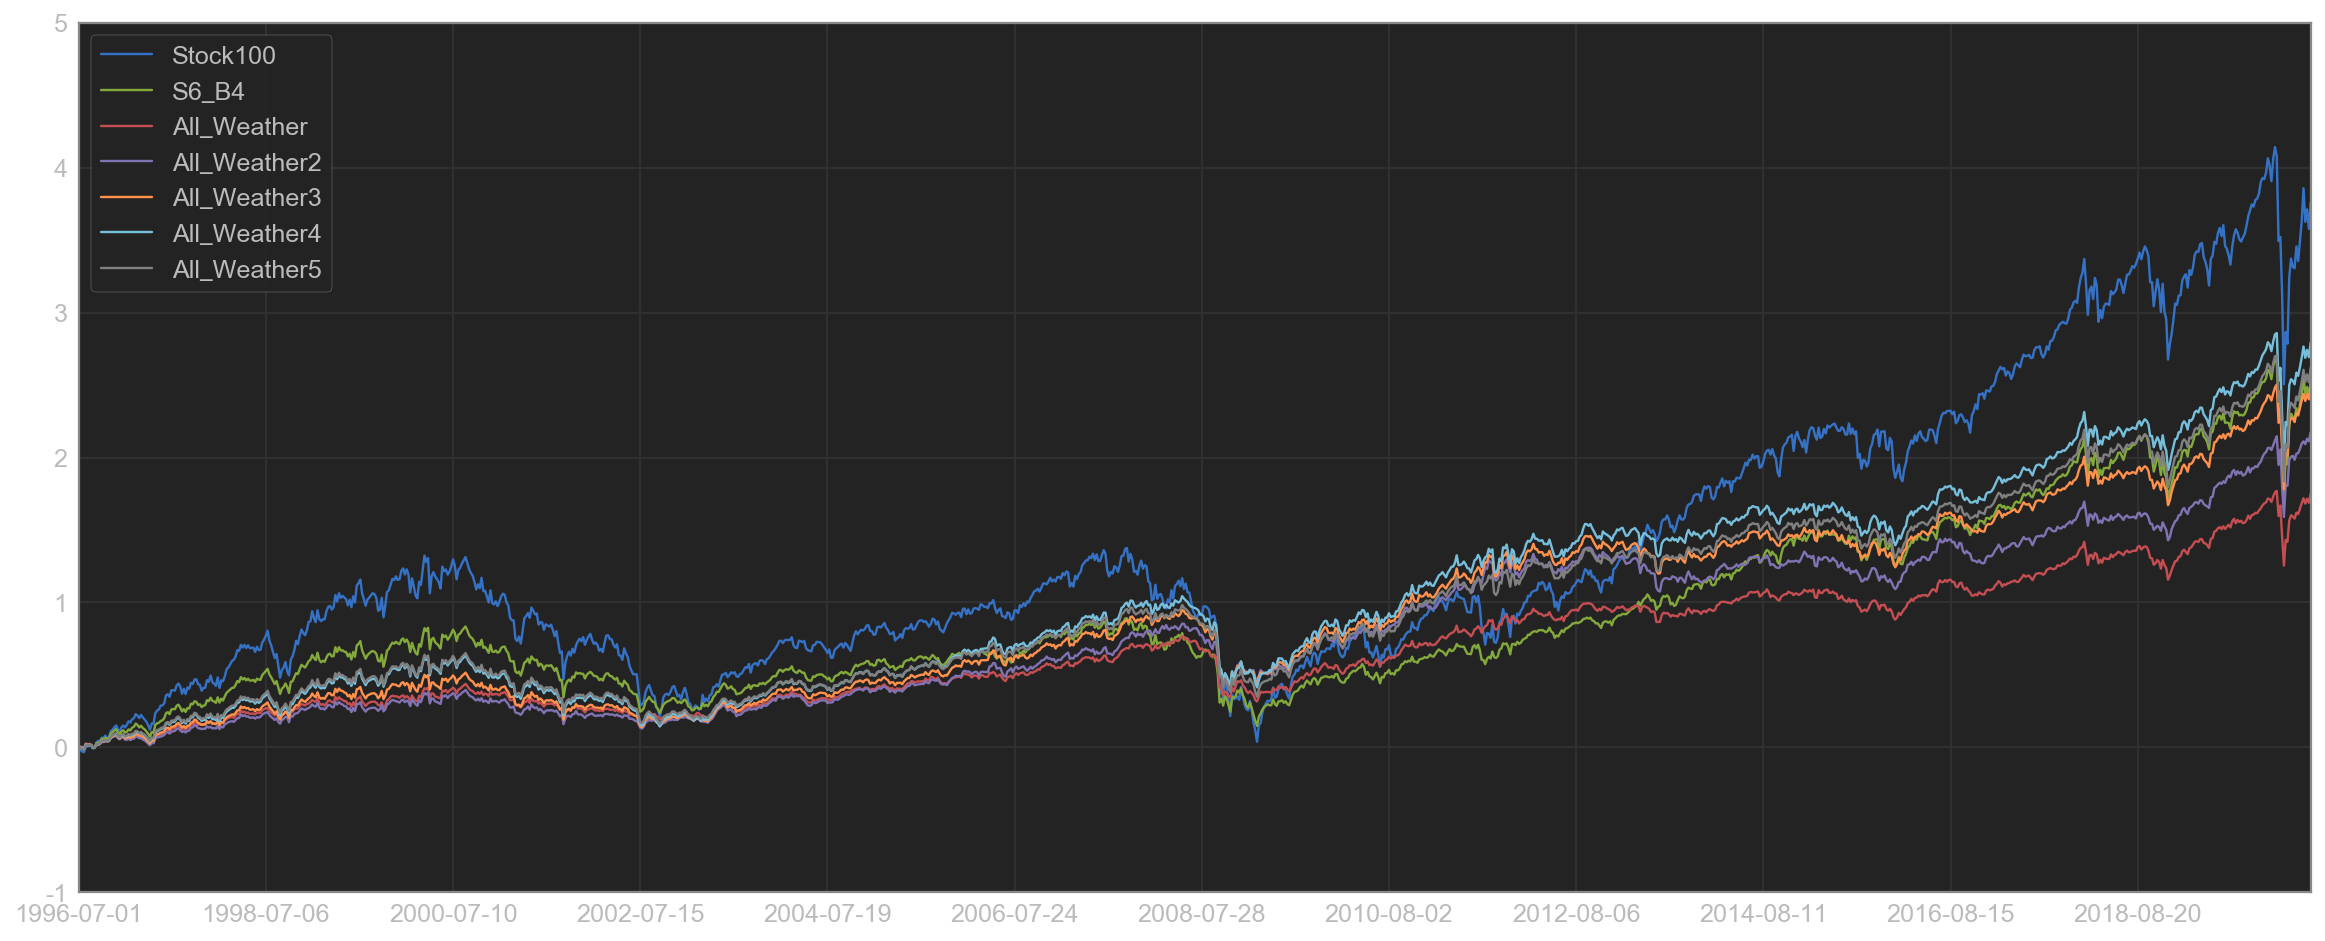

In [19]:
# New all_weather portfolio 누적 수익률 추이

plt.figure(figsize=(20, 8))

plt.plot(port_cul_df.index, port_cul_df.Stock100, label="Stock100")
plt.plot(port_cul_df.index, port_cul_df.S6_B4, label="S6_B4")
plt.plot(port_cul_df.index, port_cul_df.All_Weather, label="All_Weather")
plt.plot(port_cul_df.index, port_cul_df.All_Weather2, label="All_Weather2")
plt.plot(port_cul_df.index, port_cul_df.All_Weather3, label="All_Weather3")
plt.plot(port_cul_df.index, port_cul_df.All_Weather4, label="All_Weather4")
plt.plot(port_cul_df.index, port_cul_df.All_Weather5,
         label="All_Weather5", color='grey')

plt.xticks(cumul_index_df.index[::105])
plt.axis(["1996-07-01", "2020-06-29", -1, 5])

plt.grid(True)
plt.legend()
plt.show()

In [20]:
# stock100%, s6_b4, All_weather 4의 누적 수익률, 최고 주간 상승폭, 최고 주간 하락폭, 주간 마이너스 수 비교

data_cumul_rate_2nd = pd.Series({"Stock100": port_cul_df["Stock100"].loc["2020-06-29"],
                                 "S6_B4": port_cul_df["S6_B4"].loc["2020-06-29"],
                                 "All_Weather4": port_cul_df["All_Weather4"].loc["2020-06-29"]})
data_max_2nd = pd.Series({"Stock100": port_df["Stock100"].max(),
                          "S6_B4": port_df["S6_B4"].max(),
                          "All_Weather4": port_df["All_Weather4"].max()})
data_min_2nd = pd.Series({"Stock100": port_df["Stock100"].min(),
                          "S6_B4": port_df["S6_B4"].min(),
                          "All_Weather4": port_df["All_Weather4"].min()})
data_minus_count_2nd = pd.Series({"Stock100": (port_df["Stock100"] < 0).sum(),
                                  "S6_B4": (port_df["S6_B4"] < 0).sum(),
                                  "All_Weather4": (port_df["All_Weather4"] < 0).sum()})

summary_port_df_2nd = pd.DataFrame({"누적 수익률": data_cumul_rate_2nd,
                                    "최고 주간 상승폭": data_max_2nd,
                                    "최고 주간 하락폭": data_min_2nd,
                                    "주간 마이너스 수": data_minus_count_2nd
                                    })
summary_port_df_2nd

,누적 수익률,최고 주간 상승폭,최고 주간 하락폭,주간 마이너스 수
Stock100,3.760906,0.121017,-0.181955,548
S6_B4,2.524769,0.086061,-0.120002,561
All_Weather4,2.792176,0.082988,-0.098165,548


**New All Weather 포트폴리오 백테스트 결과**

> - **주식 50%, 장기채권 20%, 중기채권 5%, 원자재 5%, 금 20%의 All Weather 포트폴리오 4번이 가장 수익률 측면에서 가장 높은 것을 확인** 
> - **최고 주간 하락폭도 다른 두 포트폴리오에 비해 낮고 주간 마이너스 수 또한 감소한 것을 확인** 

# 퇴직연금펀드 기획

In [21]:
# ETF(상품) data 수집

spy_etf = pd.read_csv("./data/SPY.csv")
gld_etf = pd.read_csv("./data/Gld.csv")
dbc_etf = pd.read_csv("./data/DBC.csv")
ief_etf = pd.read_csv("./data/IEF.csv")
tlt_etf = pd.read_csv("./data/TLT.csv")

# ETF(상품) 데이터 프레임 만들기
etf_closes_df = pd.DataFrame({'Date': spy_etf["Date"].copy(),
                              'SP_Close': spy_etf["Close"].copy(),
                              'Long_Close': tlt_etf["Close"].copy(),
                              'Interm_Close': ief_etf["Close"].copy(),
                              'Commodity_Close': dbc_etf["Close"].copy(),
                              'Gold_Close': gld_etf["Close"].copy()}).round(2)

etf_closes_df = etf_closes_df.set_index(
    'Date', drop=True, append=False, verify_integrity=True)
etf_closes_df = etf_closes_df.tail(1)
etf_closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
2020-06-29,304.46,164.73,122.09,12.25,166.63


In [22]:
# 펀드는 New All Weather portfolio 4번에 근거하여 배분된 자산의 총 합을 500으로 나눈 값으로 가정

etf_closes_df["퇴직연금펀드"] = (etf_closes_df["SP_Close"].iloc[0]*50 +
                           etf_closes_df["Long_Close"].iloc[0]*20 +
                           etf_closes_df["Interm_Close"].iloc[0]*5 +
                           etf_closes_df["Commodity_Close"].iloc[0]*5 +
                           etf_closes_df["Gold_Close"].iloc[0]*20
                           )/500

etf_closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close,퇴직연금펀드
Date,,,,,,
2020-06-29,304.46,164.73,122.09,12.25,166.63,45.0438


## 퇴직연금펀드 기대수익률과 위험률(변동성)

### 기대수익률(return)

In [23]:
# 각 자산별 weekly 로그 수익률 계산
logret_df = np.log(closes_df/closes_df.shift(1))
logret_df.columns = ["주식", "중기채", "장기채", "원자재", "금"]

# 각 자산별 weekly 평균 로그 수익률 계산
week_mprofit = logret_df.mean()
week_mprofit

# 각 자산별 yearly 평균 로그 수익률 계산
# 거래일 252 일 / 5 = 50.4주
# 벡터로 형변환
year_mprofit = week_mprofit * 52
year_mprofit = round(year_mprofit*100, 4)
year_mprofit

주식     6.4811
중기채    2.1313
장기채    0.7833
원자재    1.9552
금      6.4151
dtype: float64

In [24]:
# 주식100% 연평균 기대 수익률
stock = np.array([1, 0, 0, 0, 0])
stock_return_rate = stock.dot(year_mprofit)
stock_return_rate = round(stock_return_rate, 2)
stock_return_rate

6.48

In [25]:
# S6_b4 연평균 기대 수익률
s6_b4 = np.array([0.6, 0.4, 0, 0, 0])
s6_b4_rate = s6_b4.dot(year_mprofit)
s6_b4_rate = round(s6_b4_rate, 2)
s6_b4_rate

4.74

In [26]:
# 포트폴리오별 기대 수익률

# 포트폴리오별 가중치
retirement_fund = np.array([0.5, 0.2, 0.05, 0.005, 0.2])

# 가중치 * 자산별 년간 평균 로그 수익률 계산
retirement_fund_return_rate = retirement_fund.dot(year_mprofit)
retirement_fund_return_rate = round(retirement_fund_return_rate, 2)

retirement_fund_return_rate

5.0

### 위험성(변동성)
- 연평균 기대수익률을 얼마나 달성할 수 있는지에 대한 예측치로써 연평균 수익률에 대한 표준편차로 구할 수 있다.

In [27]:
logret_df.cov()
cov_mat = logret_df.cov()*52
# 행렬로 타입 변환
cov_mat = cov_mat.values

stock_return_rate_var = np.dot(np.dot(stock, cov_mat), stock.T)
stock_return_rate_risk = np.sqrt(stock_return_rate_var)
s6_b4_rate_var = np.dot(np.dot(s6_b4, cov_mat), s6_b4.T)
s6_b4_risk = np.sqrt(s6_b4_rate_var)
retirement_fund_return_rate_var = np.dot(
    np.dot(retirement_fund, cov_mat), retirement_fund.T)
retirement_fund_return_rate_risk = np.sqrt(retirement_fund_return_rate_var)

print("주식 100% 포트폴리오 위험도 : ", round(stock_return_rate_risk, 4))
print("주식 60%, 채권 40% 포트폴리오 위험도 : ", round(s6_b4_risk, 4))
print("all weather 포트폴리오 위험도 : ", round(retirement_fund_return_rate_risk, 4))

주식 100% 포트폴리오 위험도 :  0.1812
주식 60%, 채권 40% 포트폴리오 위험도 :  0.1064
all weather 포트폴리오 위험도 :  0.0967


# 결론
    - 30살에 59살까지 30년간 매년 400만원으로 "인생은 60부터!" 펀드를 가입한다면 60살에 얻게 될 수익과 수익률은?
    - 매년 6월 마지막 주 가격으로 1년에 한 번 매수한다고 가정
    - 원달러 환율은 1100으로 고정
    - 400만원 : $ 3,637
    - 400만원 이상 펀드를 구매할 수 없으며, 남은 금액은 투자하지 않는다.
    - ETF의 분배금은 무시한다.

In [28]:
# 20년 6월 29일 fund 금액을 기준으로 30년 간의 기대수익률을 반영한 데이터 프레임 만들기

etf_fund_df = etf_closes_df["퇴직연금펀드"]

for i in range(0, 29):
    new_price = etf_fund_df.iloc[i]*(1 + retirement_fund_return_rate/100)
    etf_fund_df = etf_fund_df.append(pd.Series(new_price),
                                     ignore_index=True, verify_integrity=True)

# 연도 컬럼 추가

year = list(range(2020, 2050))
etf_fund_df = pd.DataFrame(etf_fund_df)
etf_fund_df = etf_fund_df.rename({0: "Future_Price"}, axis=1)
etf_fund_df["year"] = year
etf_fund_df = round(etf_fund_df.set_index("year"), 2)
etf_fund_df.head()

,Future_Price
year,
2020,45.04
2021,47.30
2022,49.66
2023,52.14
2024,54.75


In [29]:
# 매년 $ 3,637 달러로 살 수 있는 개수(n)과 총 금액(total buy) 구하여 컬럼에 추가하기

etf_fund_df["invest_money"] = 3637
etf_fund_df["buying_nums"] = np.trunc(
    etf_fund_df["invest_money"] / etf_fund_df["Future_Price"])
etf_fund_df["total_return"] = etf_fund_df["Future_Price"] * \
    etf_fund_df["buying_nums"]
etf_fund_df.head()

,Future_Price,invest_money,buying_nums,total_return
year,,,,
2020,45.04,3637,80.0,3603.20
2021,47.30,3637,76.0,3594.80
2022,49.66,3637,73.0,3625.18
2023,52.14,3637,69.0,3597.66
2024,54.75,3637,66.0,3613.50


In [30]:
# 30년간 New All Weather Portfolio 4의 퇴직연금펀드를 투자하였을 때 기대수익금

result = etf_fund_df["Future_Price"].iloc[0] *\
    ((1 + retirement_fund_return_rate/100)**31) * \
    etf_fund_df["buying_nums"].sum()
result

262849.7822640342

In [31]:
# 30년간 카카오 1% 적금에 저축하였을 때 기대수익금
save = 3637*30*(1.01**31)
save

148534.43310349312

In [32]:
# 퇴직연금펀드와 카카오 적금의 30년 뒤 기대수익금 비교

result_df = pd.DataFrame([result])
save_df = pd.DataFrame([save])


result_df = result_df.rename({0: "result_fund"}, axis=1)
save_df = save_df.rename({0: "result_save"}, axis=1)

return_result_df = pd.concat([result_df, save_df], axis=1)
return_result_df["result"] = 2050.07

return_result_df.set_index("result", inplace=True)

return_result_df.round(2)

,result_fund,result_save
result,,
2050.07,262849.78,148534.43


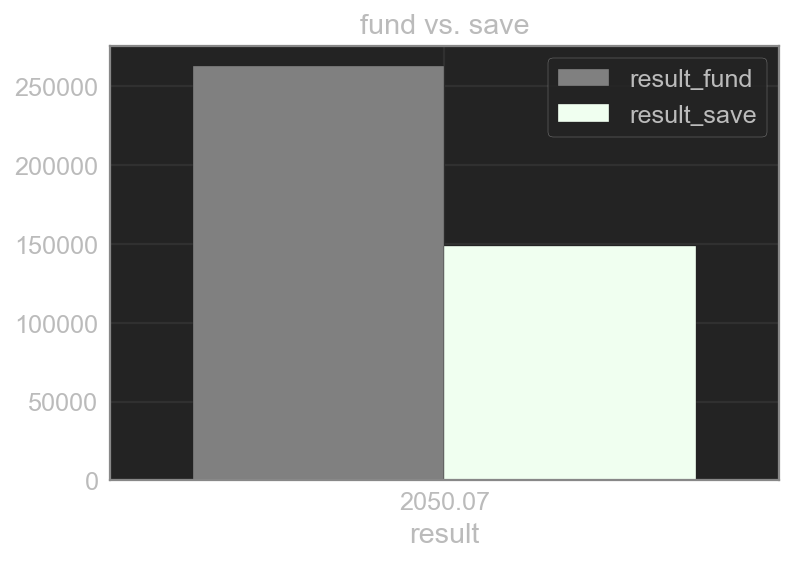

In [33]:
ax = return_result_df.plot(kind='bar', width=1.5, title="fund vs. save",
                           rot=0, color=['grey', 'honeydew'])
plt.show()